In [2]:
import pandas as pd
import numpy as np

In [3]:
pd.Series(np.random.rand(5), index=['a', 'b', 'c', 'd', 'e'])

a    0.001075
b    0.058924
c    0.910743
d    0.223445
e    0.251061
dtype: float64

In [5]:
s = pd.Series(np.random.rand(5))
df = pd.DataFrame(s, columns=['column 1'])
df

,column 1
0,0.476352
1,0.820382
2,0.891713
3,0.763351
4,0.112349


In [6]:
df['column 2'] = df['column 1'] * 4

In [7]:
df

,column 1,column 2
0,0.476352,1.905406
1,0.820382,3.281529
2,0.891713,3.566853
3,0.763351,3.053405
4,0.112349,0.449395


In [12]:
table = df.describe()
table['column 1']['mean']

0.61282940332295122

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [15]:
df = pd.read_csv("/Users/abhijitj/Downloads/climate/GlobalTemperatures.csv")

In [16]:
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
la_avg_temp = df.iloc[:, :2]
la_avg_temp['LandAverageTemperature'] = la_avg_temp['LandAverageTemperature'].fillna(method="ffill")

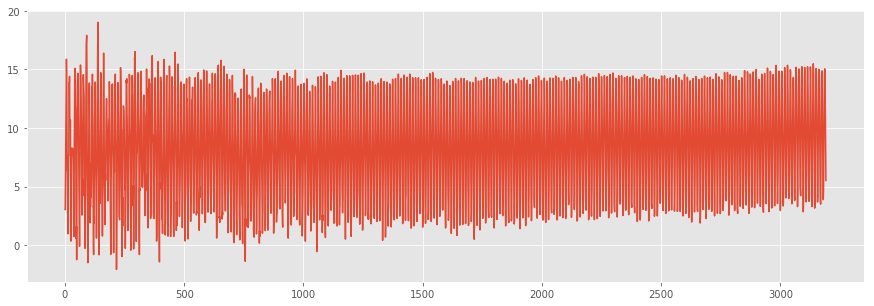

In [45]:
plt.figure(figsize=[15, 5])
plt.plot(la_avg_temp['LandAverageTemperature'])


In [46]:
g = pd.DatetimeIndex(la_avg_temp['dt'])
grouped = la_avg_temp.groupby([g.year]).mean()

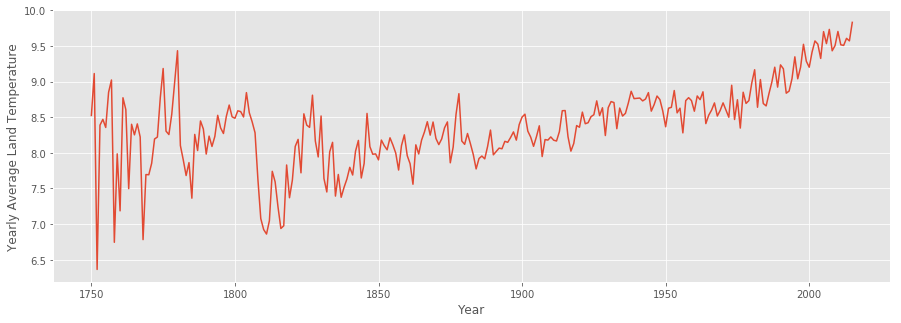

In [47]:
plt.figure(figsize=[15,5])
plt.plot(grouped['LandAverageTemperature'])
plt.xlabel('Year')
plt.ylabel('Yearly Average Land Temperature')

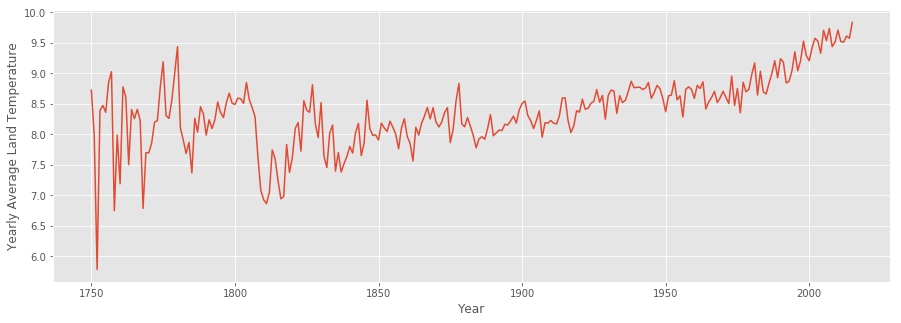

In [39]:

plt.figure(figsize=[15,5])
plt.plot(grouped['LandAverageTemperature'])
plt.xlabel('Year')
plt.ylabel('Yearly Average Land Temperature')

In [49]:
from sklearn.linear_model import LinearRegression as LinReg

In [53]:
x = grouped.index.values.reshape(-1, 1)
y = grouped['LandAverageTemperature'].values

In [54]:
reg = LinReg()
reg.fit(x, y)
y_preds = reg.predict(x)
print reg.score(x, y)

0.376683227531


/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


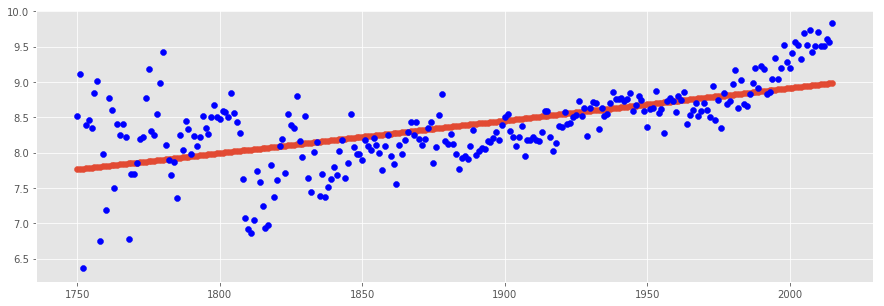

In [56]:
plt.figure(figsize=[15,5])
plt.scatter(x=x, y=y_preds)
plt.scatter(x=x, y=y, c='b')